In [38]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [19]:
import requests
requests.__version__

'2.25.1'

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | barahona
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | rzhev
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | tiarei
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | hervey bay
Processing Record 20 of Set 1 | quelimane
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | nikolskoye
Processin

Processing Record 38 of Set 4 | krasnoselkup
Processing Record 39 of Set 4 | gat
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | bourail
Processing Record 42 of Set 4 | zhenlai
Processing Record 43 of Set 4 | magdagachi
Processing Record 44 of Set 4 | tucuman
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | cervo
Processing Record 47 of Set 4 | dukat
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | koungheul
Processing Record 50 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 5 | ambovombe
Processing Record 2 of Set 5 | gayeri
Processing Record 3 of Set 5 | ishigaki
Processing Record 4 of Set 5 | thaton
Processing Record 5 of Set 5 | saint-pierre
Processing Record 6 of Set 5 | fairbanks
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | duz
City not found. Skipping...
Processing Record 9 of Set 5 | peace river
Processing Record 10 of S

Processing Record 26 of Set 8 | half moon bay
Processing Record 27 of Set 8 | santa cruz del sur
Processing Record 28 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 29 of Set 8 | ishinomaki
Processing Record 30 of Set 8 | bowen
Processing Record 31 of Set 8 | zyryanskoye
Processing Record 32 of Set 8 | tommot
Processing Record 33 of Set 8 | inhambane
Processing Record 34 of Set 8 | qasigiannguit
Processing Record 35 of Set 8 | suntar
Processing Record 36 of Set 8 | tafalla
Processing Record 37 of Set 8 | hazaribag
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | ibra
Processing Record 40 of Set 8 | barcelos
Processing Record 41 of Set 8 | pokhara
Processing Record 42 of Set 8 | shiraz
Processing Record 43 of Set 8 | sabratah
Processing Record 44 of Set 8 | mareeba
Processing Record 45 of Set 8 | kavaratti
Processing Record 46 of Set 8 | belaya gora
Processing Record 47 of Set 8 | banikoara
Processing Record 48 of Set 8 | araouane
Proces

Processing Record 13 of Set 12 | broome
Processing Record 14 of Set 12 | san francisco del mar
Processing Record 15 of Set 12 | zhangjiakou
Processing Record 16 of Set 12 | pundaguitan
Processing Record 17 of Set 12 | taoudenni
Processing Record 18 of Set 12 | baie-comeau
Processing Record 19 of Set 12 | lambarene
Processing Record 20 of Set 12 | catalao
Processing Record 21 of Set 12 | murray bridge
Processing Record 22 of Set 12 | juybar
Processing Record 23 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 24 of Set 12 | mapiri
Processing Record 25 of Set 12 | esperance
Processing Record 26 of Set 12 | sesimbra
Processing Record 27 of Set 12 | benjamin constant
Processing Record 28 of Set 12 | houston
Processing Record 29 of Set 12 | meyungs
City not found. Skipping...
Processing Record 30 of Set 12 | pingliang
Processing Record 31 of Set 12 | trelaze
Processing Record 32 of Set 12 | lalganj
Processing Record 33 of Set 12 | sabinas hidalgo
Processing Record 34 of 

In [31]:
len(city_data)

548

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,37.42,100,75,2.30,CA,2021-10-04 15:18:13
1,Barahona,18.2085,-71.1008,80.42,83,75,9.22,DO,2021-10-04 15:18:13
2,Mataura,-46.1927,168.8643,46.47,85,42,7.49,NZ,2021-10-04 15:18:13
3,Hilo,19.7297,-155.0900,71.80,91,75,3.44,US,2021-10-04 15:17:27
4,Avarua,-21.2078,-159.7750,73.45,73,94,4.61,CK,2021-10-04 15:18:14
5,Bredasdorp,-34.5322,20.0403,62.28,61,1,18.07,ZA,2021-10-04 15:18:14
6,Rzhev,56.2624,34.3282,46.58,76,24,6.42,RU,2021-10-04 15:18:14
7,Tasiilaq,65.6145,-37.6368,37.56,61,100,1.81,GL,2021-10-04 15:18:15
8,Ushuaia,-54.8000,-68.3000,44.22,65,40,27.63,AR,2021-10-04 15:18:15
9,Thompson,55.7435,-97.8558,46.56,71,75,9.22,CA,2021-10-04 15:15:56


In [33]:
new_column_order = ["City", "Country","Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [34]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-10-04 15:18:13,62.4560,-114.3525,37.42,100,75,2.30
1,Barahona,DO,2021-10-04 15:18:13,18.2085,-71.1008,80.42,83,75,9.22
2,Mataura,NZ,2021-10-04 15:18:13,-46.1927,168.8643,46.47,85,42,7.49
3,Hilo,US,2021-10-04 15:17:27,19.7297,-155.0900,71.80,91,75,3.44
4,Avarua,CK,2021-10-04 15:18:14,-21.2078,-159.7750,73.45,73,94,4.61
5,Bredasdorp,ZA,2021-10-04 15:18:14,-34.5322,20.0403,62.28,61,1,18.07
6,Rzhev,RU,2021-10-04 15:18:14,56.2624,34.3282,46.58,76,24,6.42
7,Tasiilaq,GL,2021-10-04 15:18:15,65.6145,-37.6368,37.56,61,100,1.81
8,Ushuaia,AR,2021-10-04 15:18:15,-54.8000,-68.3000,44.22,65,40,27.63
9,Thompson,CA,2021-10-04 15:15:56,55.7435,-97.8558,46.56,71,75,9.22


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

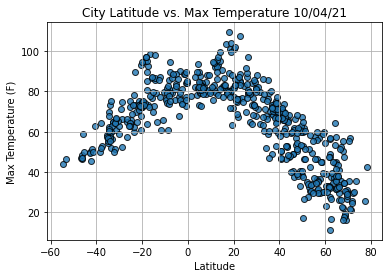

In [43]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

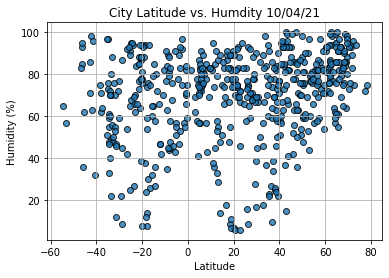

In [44]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humdity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

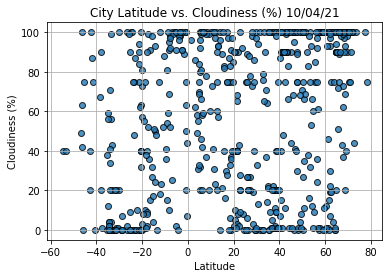

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

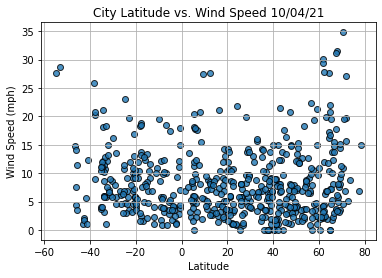

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()